In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/CVD_Vital_SIgns.csv"  # Update this with the correct path
data = pd.read_csv(file_path)

# Quick overview
print(data.info())  # Check for null values and data types



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject_id         12685 non-null  int64  
 1   icustay_id         12685 non-null  float64
 2   heart_rate         12685 non-null  float64
 3   blood_pressure     12685 non-null  float64
 4   oxygen_saturation  12685 non-null  float64
 5   respiratory_rate   12685 non-null  float64
 6   temperature        12685 non-null  float64
 7   Label              12685 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 792.9 KB
None


In [2]:
print(data.describe())  # Summary statistics


         subject_id     icustay_id    heart_rate  blood_pressure  \
count  12685.000000   12685.000000  1.268500e+04    12685.000000   
mean   62323.228774  250743.783385  8.808520e+02      102.620015   
std    24196.542342   28875.037774  8.878727e+04       16.847303   
min       23.000000  200001.000000  2.600000e+01       -2.000000   
25%    47271.000000  225399.497551  9.000000e+01       94.000000   
50%    64426.000000  251110.716778  9.400000e+01       98.000000   
75%    81840.000000  275738.000000  9.675142e+01      106.970951   
max    99999.000000  299962.000000  9.999999e+06      290.000000   

       oxygen_saturation  respiratory_rate   temperature         Label  
count       12685.000000      12685.000000  12685.000000  12685.000000  
mean           97.774701         21.678906     37.585934      0.499645  
std            85.470060          8.633933      5.056356      0.500020  
min            49.000000          2.000000      0.000000      0.000000  
25%            96.0000

In [3]:
print(data.head())  # First few rows

   subject_id  icustay_id  heart_rate  blood_pressure  oxygen_saturation  \
0       93837    233949.0        92.0           107.0               96.0   
1       94032    201853.0        94.0            98.0               97.0   
2       93321    248745.0        97.0            96.0               97.0   
3       94016    264325.0        94.0           102.0               98.0   
4       95659    299524.0        94.0           103.0               98.0   

   respiratory_rate  temperature  Label  
0              18.0         36.9      0  
1              16.0         37.5      0  
2              16.0         37.9      0  
3              18.0         37.9      0  
4              16.0         37.5      0  


In [4]:
# Removing unrealistic outliers based on domain knowledge
cleaned_data = data.copy()

# Define realistic ranges for each variable
cleaned_data = cleaned_data[
    (cleaned_data["heart_rate"] > 30) & (cleaned_data["heart_rate"] < 200) &
    (cleaned_data["blood_pressure"] > 50) & (cleaned_data["blood_pressure"] < 200) &
    (cleaned_data["oxygen_saturation"] > 80) & (cleaned_data["oxygen_saturation"] <= 100) &
    (cleaned_data["respiratory_rate"] > 8) & (cleaned_data["respiratory_rate"] < 50) &
    (cleaned_data["temperature"] > 35) & (cleaned_data["temperature"] < 42)
]

# Verify changes
print("Shape before cleaning:", data.shape)
print("Shape after cleaning:", cleaned_data.shape)


Shape before cleaning: (12685, 8)
Shape after cleaning: (12265, 8)


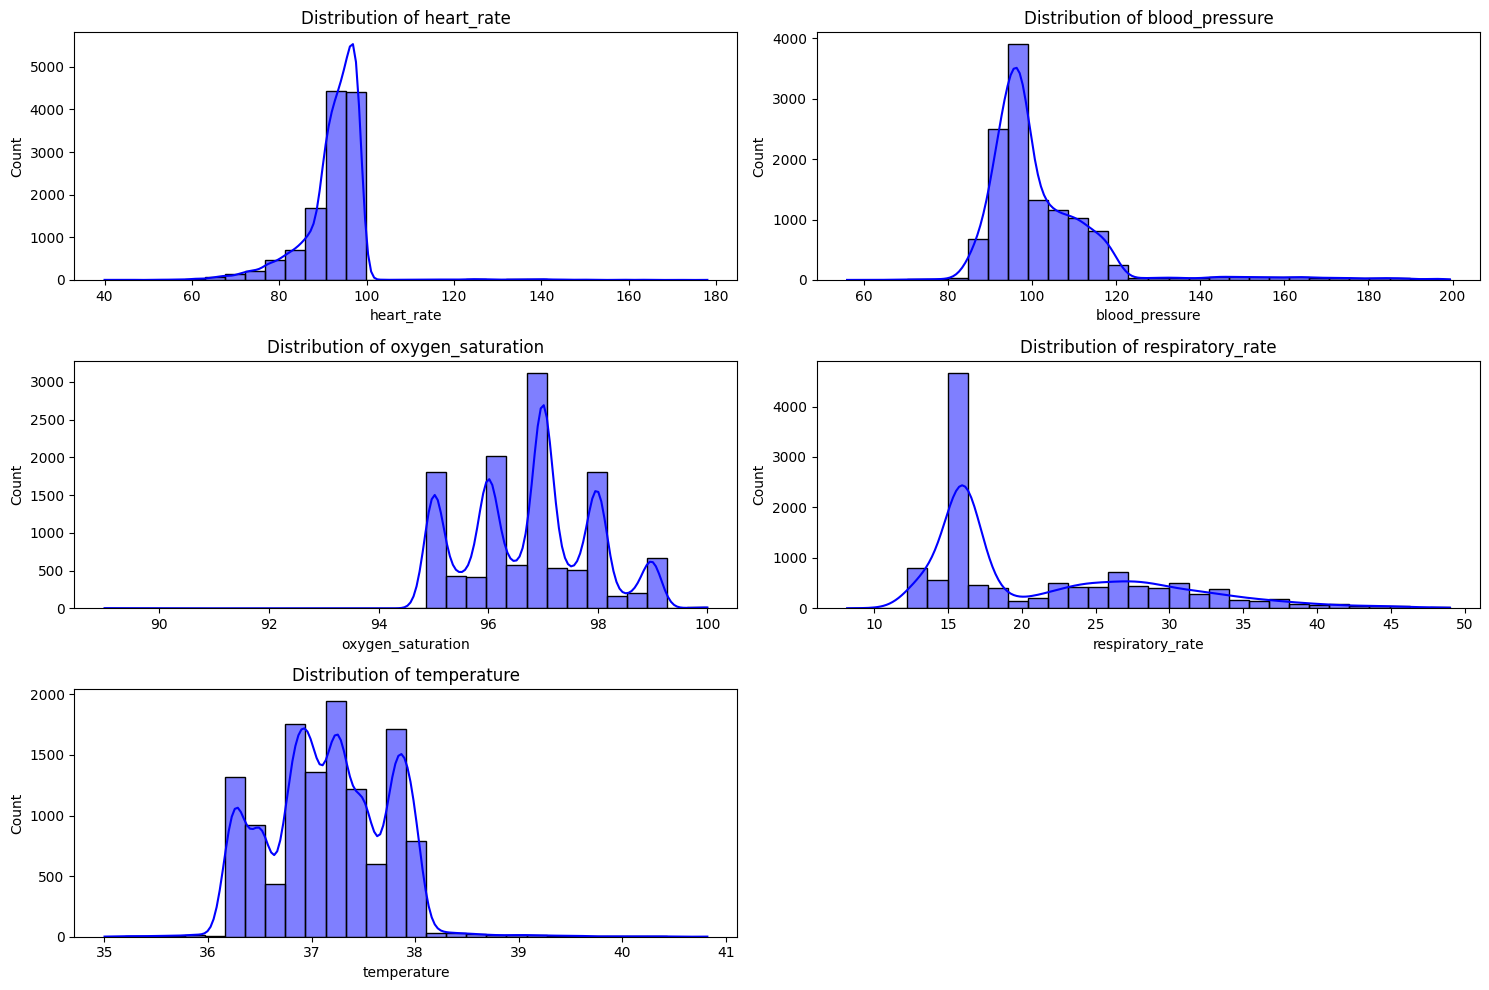

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of features
features = ["heart_rate", "blood_pressure", "oxygen_saturation", "respiratory_rate", "temperature"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(cleaned_data[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()




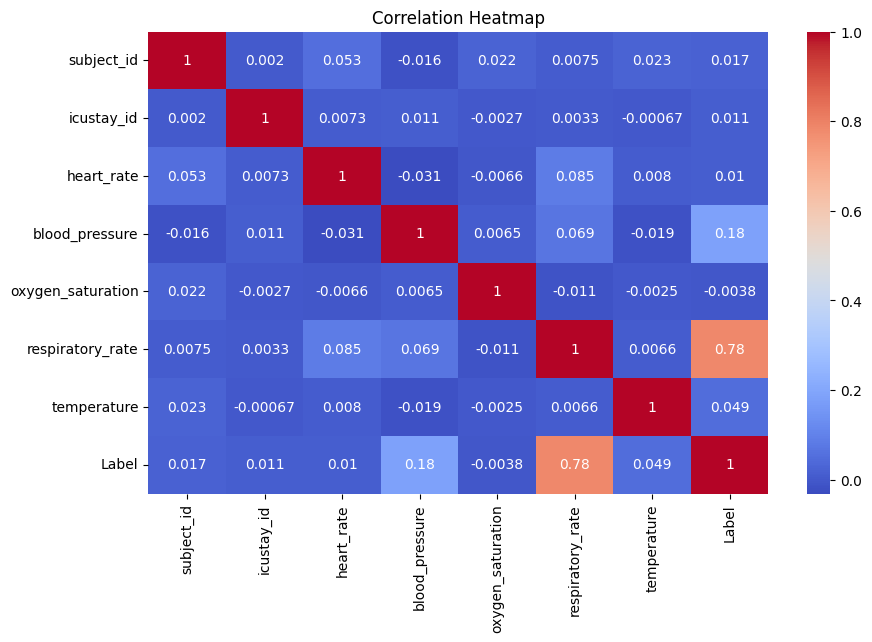

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



<ipython-input-7-1cd961fc8242>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Label", y=col, data=cleaned_data, palette="Set2")
<ipython-input-7-1cd961fc8242>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Label", y=col, data=cleaned_data, palette="Set2")
<ipython-input-7-1cd961fc8242>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Label", y=col, data=cleaned_data, palette="Set2")
<ipython-input-7-1cd961fc8242>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

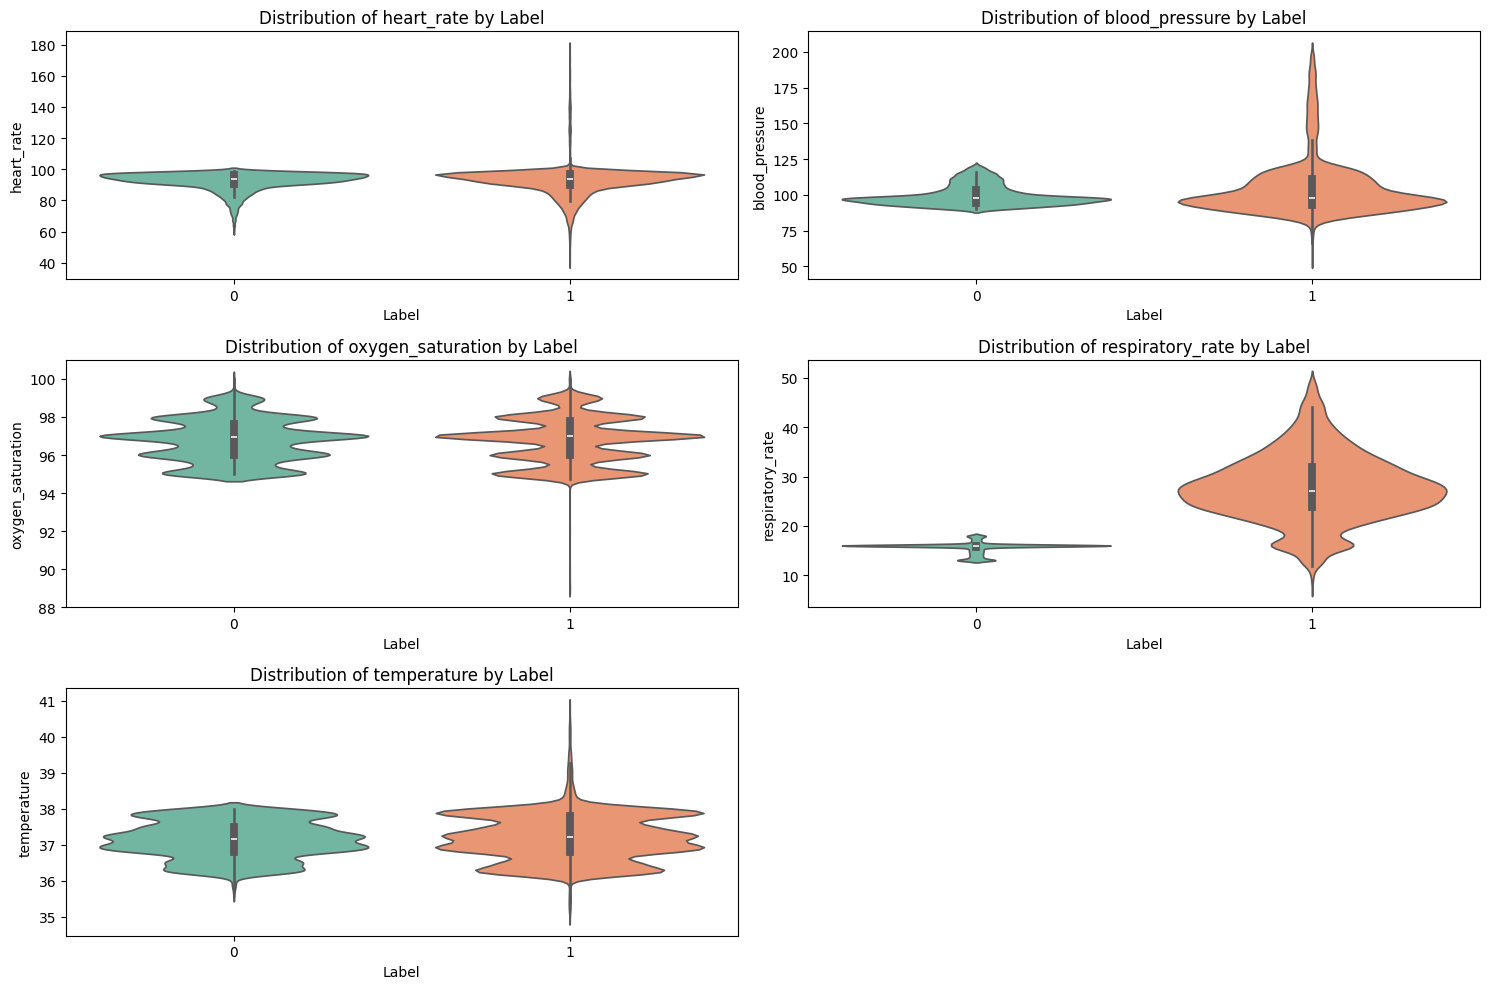

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(["heart_rate", "blood_pressure", "oxygen_saturation", "respiratory_rate", "temperature"]):
    plt.subplot(3, 2, i + 1)
    sns.violinplot(x="Label", y=col, data=cleaned_data, palette="Set2")
    plt.title(f"Distribution of {col} by Label")
plt.tight_layout()
plt.show()


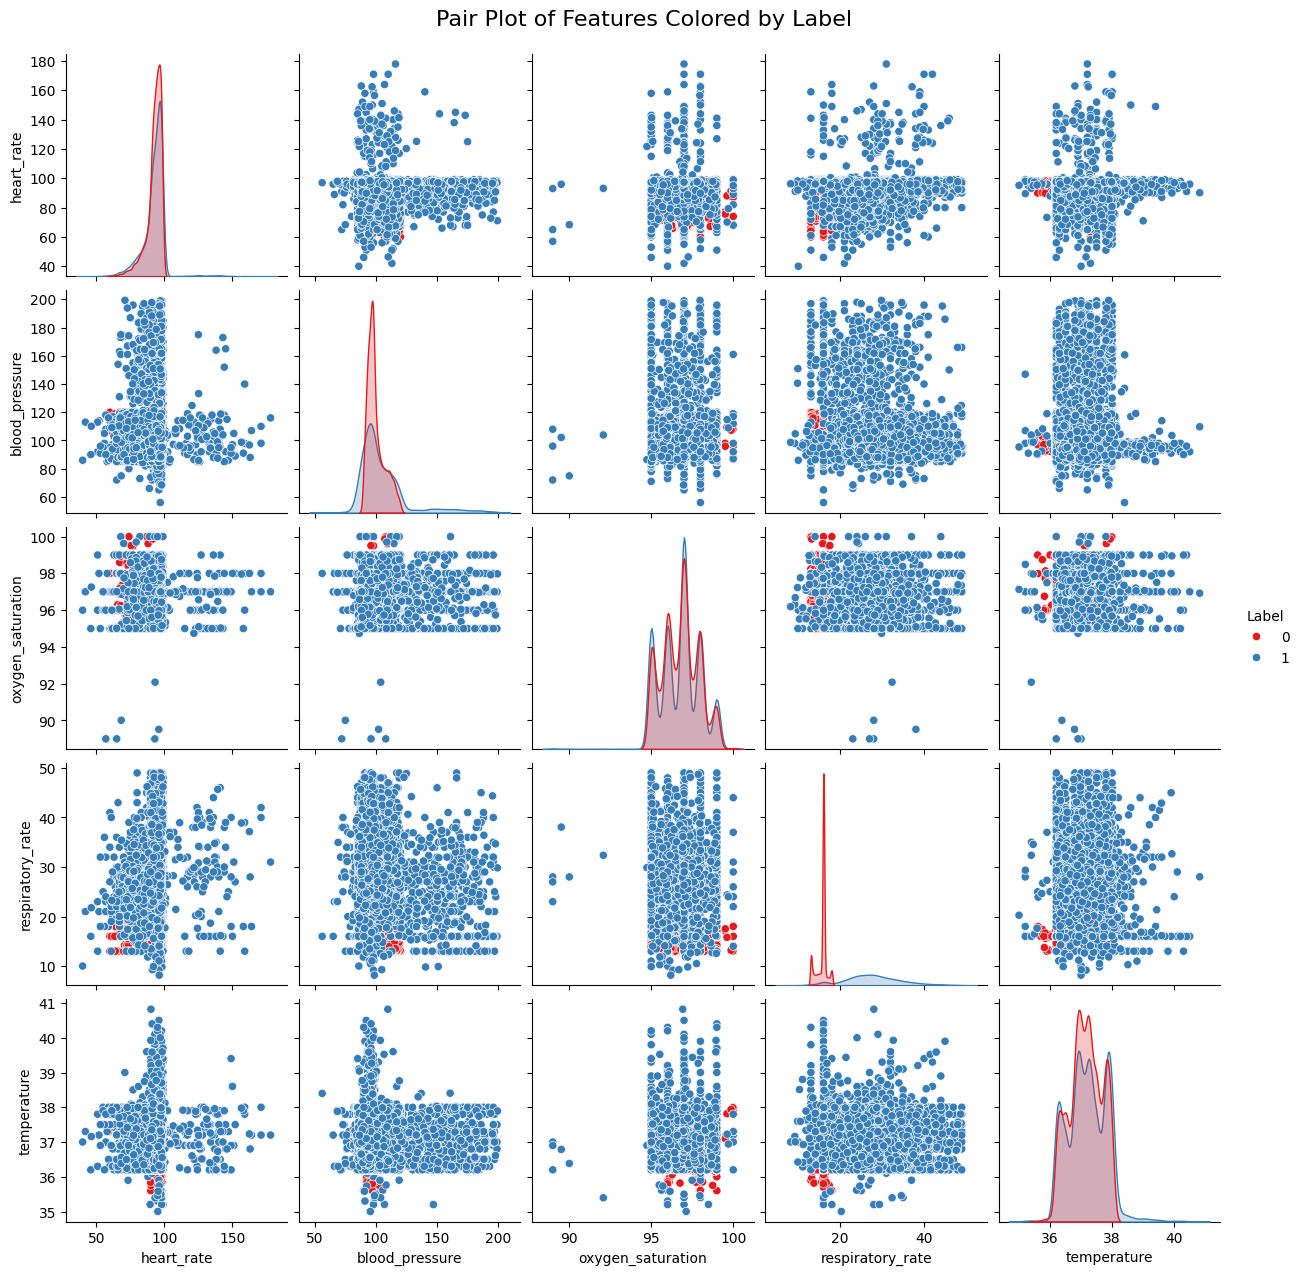

In [8]:
import seaborn as sns

# Pair plot of selected features colored by Label
sns.pairplot(cleaned_data, vars=["heart_rate", "blood_pressure", "oxygen_saturation", "respiratory_rate", "temperature"], hue="Label", palette="Set1", diag_kind="kde")
plt.suptitle("Pair Plot of Features Colored by Label", y=1.02, fontsize=16)
plt.show()


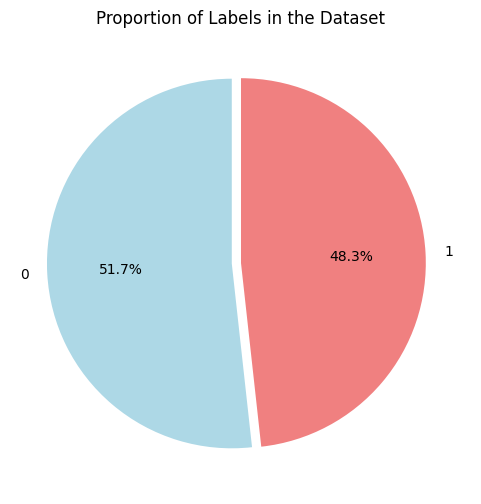

In [9]:
plt.figure(figsize=(6, 6))
cleaned_data["Label"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightcoral"], startangle=90, explode=(0.05, 0))
plt.title("Proportion of Labels in the Dataset")
plt.ylabel("")  # Remove default y-label
plt.show()


In [10]:
from imblearn.combine import SMOTEENN
from collections import Counter
X = data.drop(columns=['Label'])  # Assuming 'Label' is your target variable
y = data['Label']
# Apply SMOTE + Undersampling technique to balance the class distribution
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X, y)

# Check the resampled class distribution
resampled_distribution = Counter(y_res)
print(f"Resampled class distribution: {resampled_distribution}")

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_res, columns=X.columns)
df_resampled['Label'] = y_res

# Optionally, save the resampled dataset to a new file
df_resampled.to_csv("/content/CVD_Vital_SIgns.csv", index=False)

print(df_resampled.head())


Resampled class distribution: Counter({0: 6347, 1: 6347})
   subject_id  icustay_id  heart_rate  blood_pressure  oxygen_saturation  \
0       93837    233949.0        92.0           107.0               96.0   
1       94032    201853.0        94.0            98.0               97.0   
2       93321    248745.0        97.0            96.0               97.0   
3       94016    264325.0        94.0           102.0               98.0   
4       95659    299524.0        94.0           103.0               98.0   

   respiratory_rate  temperature  Label  
0              18.0         36.9      0  
1              16.0         37.5      0  
2              16.0         37.9      0  
3              18.0         37.9      0  
4              16.0         37.5      0  


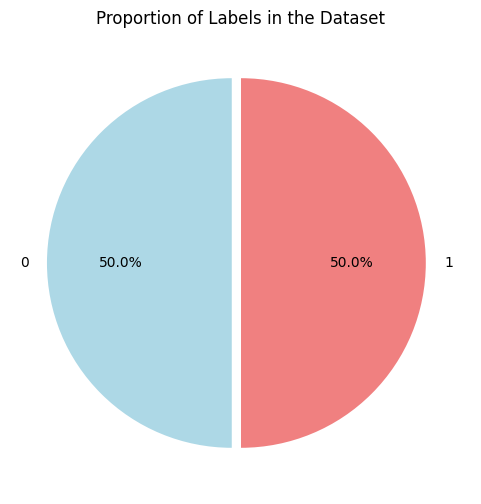

In [11]:
plt.figure(figsize=(6, 6))
df_resampled["Label"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightcoral"], startangle=90, explode=(0.05, 0))
plt.title("Proportion of Labels in the Dataset")
plt.ylabel("")  # Remove default y-label
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df_resampled.drop(["Label", "subject_id", "icustay_id"], axis=1)
y = df_resampled["Label"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<ipython-input-13-2d221f380643>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


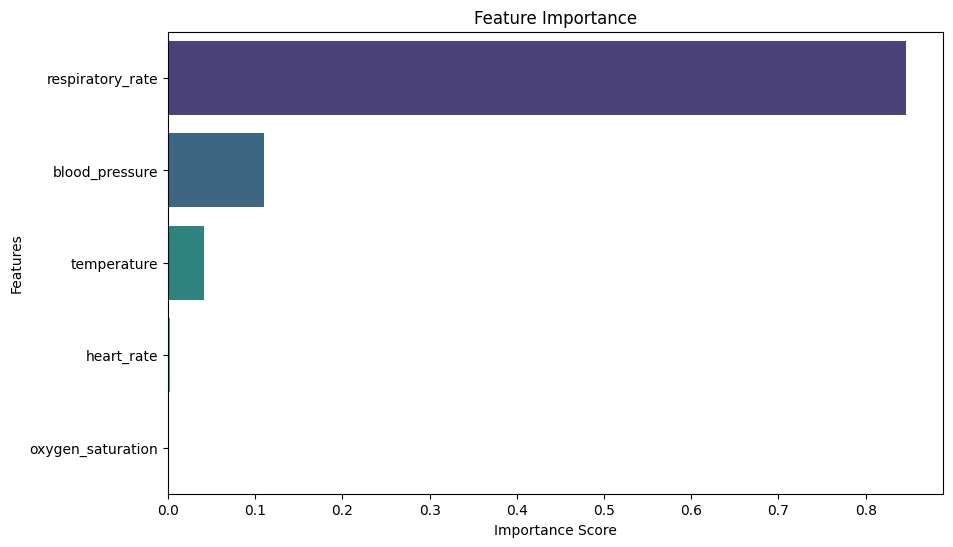

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Fit Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Feature importance
importances = gbm_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [14]:
!pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
import torch


# Convert to PyTorch tensors
y_train = np.array(y_train)
y_test = np.array(y_test)

# Initialize and train TabNet model
clf = TabNetClassifier()
clf.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], max_epochs=50, patience=10, batch_size=256, virtual_batch_size=128)

# Evaluate model
accuracy = (clf.predict(X_test_scaled) == y_test).mean()
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.24785 | val_0_auc: 0.98001 |  0:00:01s
epoch 1  | loss: 0.08368 | val_0_auc: 0.99039 |  0:00:02s
epoch 2  | loss: 0.08598 | val_0_auc: 0.98916 |  0:00:03s
epoch 3  | loss: 0.08033 | val_0_auc: 0.99108 |  0:00:05s
epoch 4  | loss: 0.08228 | val_0_auc: 0.98998 |  0:00:06s
epoch 5  | loss: 0.06981 | val_0_auc: 0.9901  |  0:00:08s
epoch 6  | loss: 0.08089 | val_0_auc: 0.99028 |  0:00:09s
epoch 7  | loss: 0.0816  | val_0_auc: 0.98735 |  0:00:10s
epoch 8  | loss: 0.07733 | val_0_auc: 0.99073 |  0:00:11s
epoch 9  | loss: 0.07342 | val_0_auc: 0.99082 |  0:00:12s
epoch 10 | loss: 0.07458 | val_0_auc: 0.99057 |  0:00:13s
epoch 11 | loss: 0.06997 | val_0_auc: 0.99084 |  0:00:14s
epoch 12 | loss: 0.07418 | val_0_auc: 0.98997 |  0:00:15s
epoch 13 | loss: 0.07491 | val_0_auc: 0.99005 |  0:00:16s

Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.99108


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.9709


In [16]:
# Save the trained model
clf.save_model("tabnet_model")


Successfully saved model at tabnet_model.zip


'tabnet_model.zip'

In [17]:
from google.colab import files
files.download("tabnet_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Load the saved model
clf.load_model("tabnet_model.zip")


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:454: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_state_dict = torch.load(f, map_location=sel

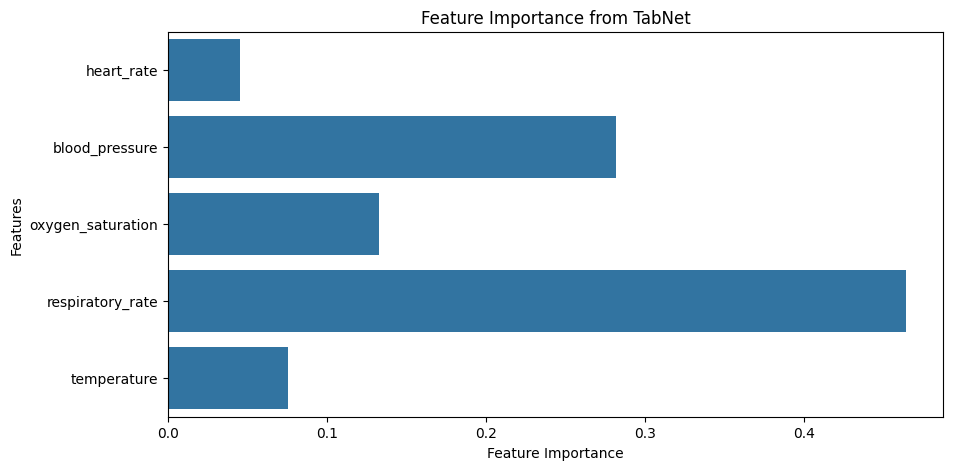

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# Feature Importance Plot
feature_importances = clf.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=X_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from TabNet")
plt.show()



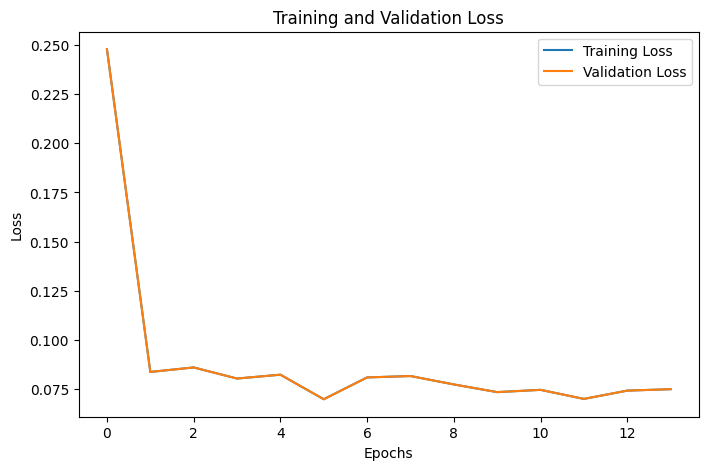

In [20]:
# Training Loss Plot
plt.figure(figsize=(8, 5))
plt.plot(clf.history["loss"], label="Training Loss")
plt.plot(clf.history["loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()



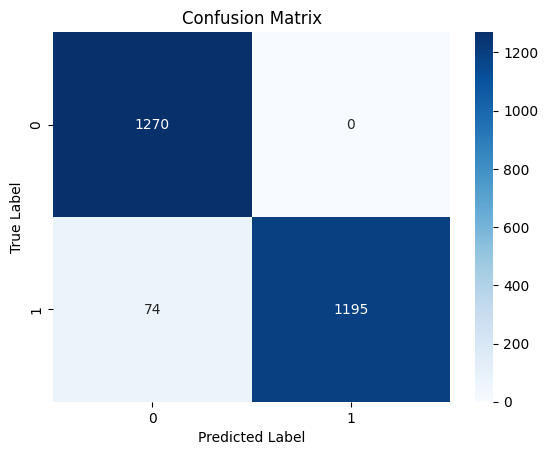

In [21]:
# Confusion Matrix
y_pred = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


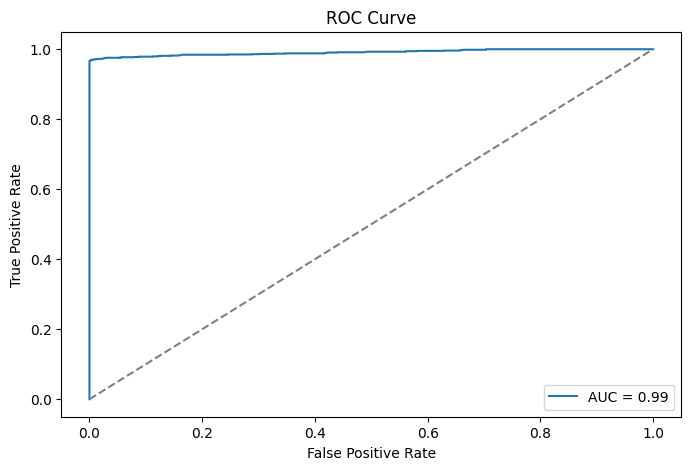

In [22]:

# ROC Curve (for binary classification)
if len(np.unique(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()



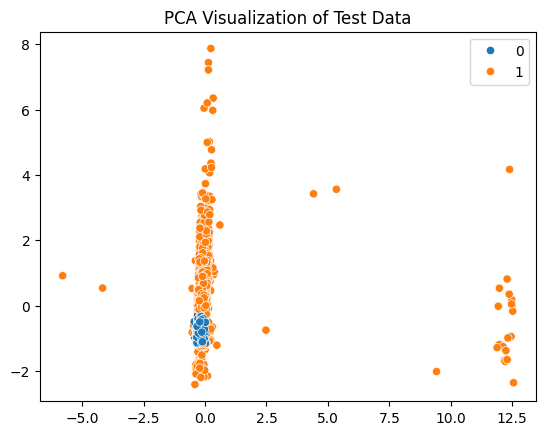

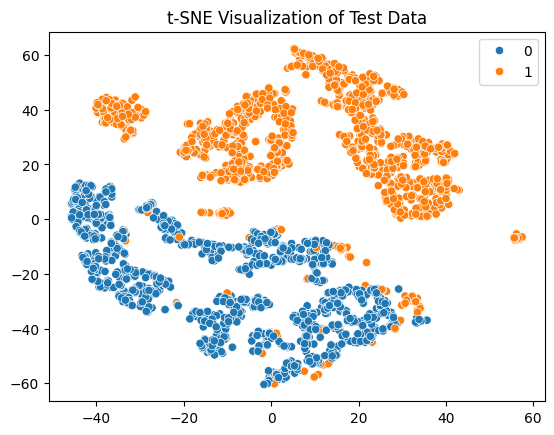

In [23]:
# PCA or t-SNE Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_test)
plt.title("PCA Visualization of Test Data")
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test_scaled)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_test)
plt.title("t-SNE Visualization of Test Data")
plt.show()


In [26]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=1d049c99402013c52e7cc98bc3fabeb464e75ae51c4b764a2dd7f3dbcc319745
  Stored in directory: /root/.cache/pip/wheels/62/f9/aa/687bd54342d2981bc78e22ee9b9bc39f92006e344e7aa1e0ac
Successfully built h2o


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import h2o
from h2o.automl import H2OAutoML
import torch

# Initialize H2O
h2o.init()

# Convert to PyTorch tensors
y_train = np.array(y_train)
y_test = np.array(y_test)

# Initialize models
models = {
    "TabNet": TabNetClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate models
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Integrating H2O AutoML
train_h2o = h2o.H2OFrame(pd.DataFrame(X_train_scaled, columns=X.columns).assign(Label=y_train))
test_h2o = h2o.H2OFrame(pd.DataFrame(X_test_scaled, columns=X.columns))

# Convert target column to factor for classification
train_h2o["Label"] = train_h2o["Label"].asfactor()

# Run AutoML
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=X.columns.tolist(), y="Label", training_frame=train_h2o)

# Get best model from AutoML
best_model = aml.leader
print("Best H2O Model:", best_model)

# Make predictions on the test set
h2o_preds = best_model.predict(test_h2o).as_data_frame()
h2o_pred_labels = h2o_preds.iloc[:, 0]  # First column contains predicted labels

# Calculate H2O model accuracy
h2o_accuracy = accuracy_score(y_test, h2o_pred_labels)
accuracy_results["H2O AutoML"] = h2o_accuracy

# Print all accuracies
print("\nFinal Accuracy Comparison:")
for model, acc in accuracy_results.items():
    print(f"{model}: {acc:.4f}")




Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcsx0eb04
  JVM stdout: /tmp/tmpcsx0eb04/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcsx0eb04/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_yxc1xd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.56502 |  0:00:01s
epoch 1  | loss: 0.26092 |  0:00:02s
epoch 2  | loss: 0.13779 |  0:00:03s
epoch 3  | loss: 0.10802 |  0:00:06s
epoch 4  | loss: 0.10256 |  0:00:07s
epoch 5  | loss: 0.09749 |  0:00:09s
epoch 6  | loss: 0.09743 |  0:00:11s
epoch 7  | loss: 0.08569 |  0:00:13s
epoch 8  | loss: 0.07976 |  0:00:14s
epoch 9  | loss: 0.0873  |  0:00:15s
epoch 10 | loss: 0.08225 |  0:00:16s
epoch 11 | loss: 0.08632 |  0:00:17s
epoch 12 | loss: 0.07175 |  0:00:19s
epoch 13 | loss: 0.07608 |  0:00:19s
epoch 14 | loss: 0.07137 |  0:00:20s
epoch 15 | loss: 0.0742  |  0:00:21s
epoch 16 | loss: 0.07967 |  0:00:21s
epoch 17 | loss: 0.06765 |  0:00:22s
epoch 18 | loss: 0.0651  |  0:00:22s
epoch 19 | loss: 0.05995 |  0:00:23s
epoch 20 | loss: 0.06637 |  0:00:24s
epoch 21 | loss: 0.06324 |  0:00:24s
epoch 22 | loss: 0.05729 |  0:00:25s
epoch 23 | loss: 0.0551  |  0:00:25s
epoch 24 | loss: 0.05584 |  0:00:26s
epoch 25 | loss: 0.06256 |  0:00:26s
epoch 26 | loss: 0.05872 |  0:00:26s
e

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:15:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Accuracy: 0.9961
Neural Network Accuracy: 0.9890
Gradient Boosting Accuracy: 0.9961
SVM Accuracy: 0.9724
Logistic Regression Accuracy: 0.9456
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Best H2O Model: Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20250303_151622


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    112                112                         99802                  8            8            8      

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [41]:
import joblib

# Save the best-performing model
best_model = models["Random Forest"]  # Choose Random Forest as it has the highest accuracy
joblib.dump(best_model, "cardio_model.pkl")

print("Best model saved as cardio_model.pkl")

from sklearn.preprocessing import StandardScaler
import joblib

# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as scaler.pkl")



Best model saved as cardio_model.pkl
Scaler saved as scaler.pkl


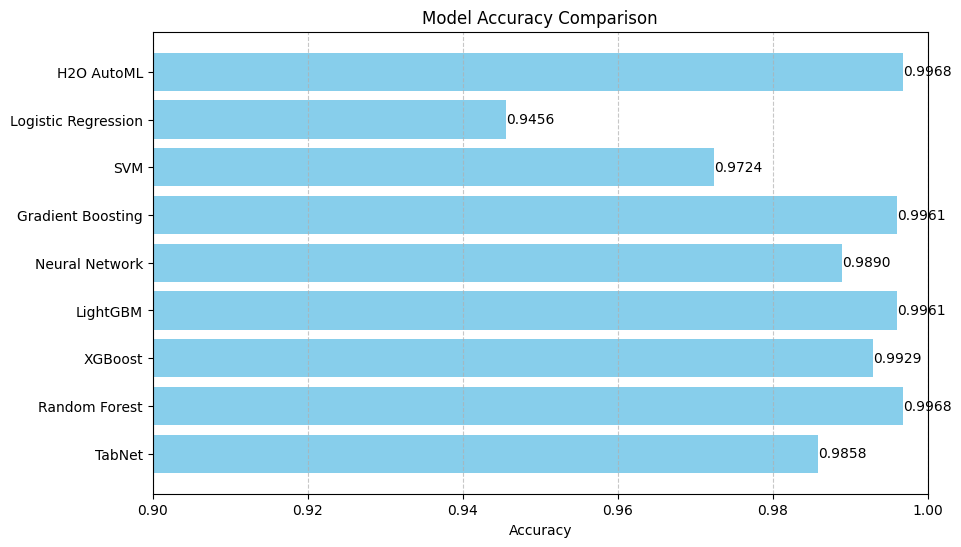

In [40]:
# Bar Plot for Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0.9, 1.0)  # Adjust range for better visualization
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add values on bars
for index, value in enumerate(accuracy_results.values()):
    plt.text(value, index, f"{value:.4f}", va='center', fontsize=10)

plt.show()


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
<ipython-input-32-5610ce88b444>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=leaderboard["model_id"][:5], x=leaderboard["auc"][:5], palette="viridis")


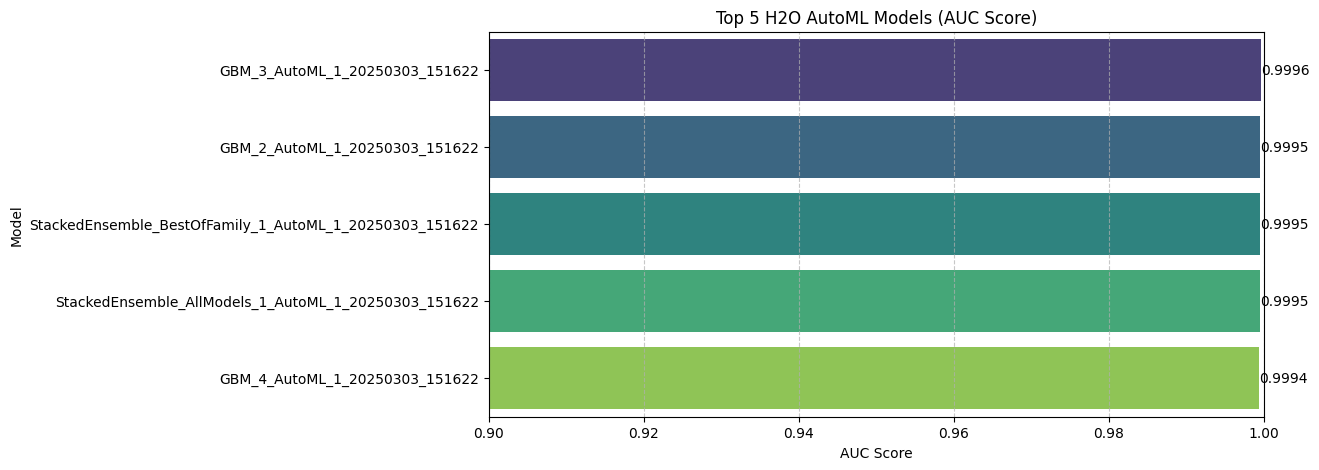

In [32]:
# Convert H2O leaderboard to Pandas DataFrame
leaderboard = aml.leaderboard.as_data_frame()

# Plot leaderboard performance
plt.figure(figsize=(10, 5))
sns.barplot(y=leaderboard["model_id"][:5], x=leaderboard["auc"][:5], palette="viridis")
plt.xlabel("AUC Score")
plt.ylabel("Model")
plt.title("Top 5 H2O AutoML Models (AUC Score)")
plt.xlim(0.9, 1.0)  # Adjust for better visualization
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add values on bars
for index, value in enumerate(leaderboard["auc"][:5]):
    plt.text(value, index, f"{value:.4f}", va='center', fontsize=10)

plt.show()


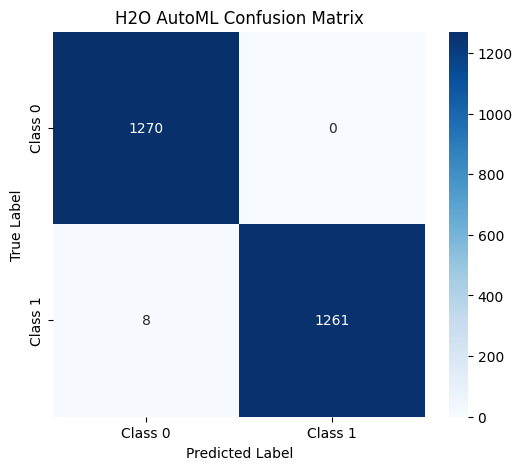

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate Confusion Matrix
cm = confusion_matrix(y_test, h2o_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("H2O AutoML Confusion Matrix")
plt.show()


<ipython-input-34-6d9d5ccf756f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var_imp['scaled_importance'], y=var_imp['variable'], palette="coolwarm")


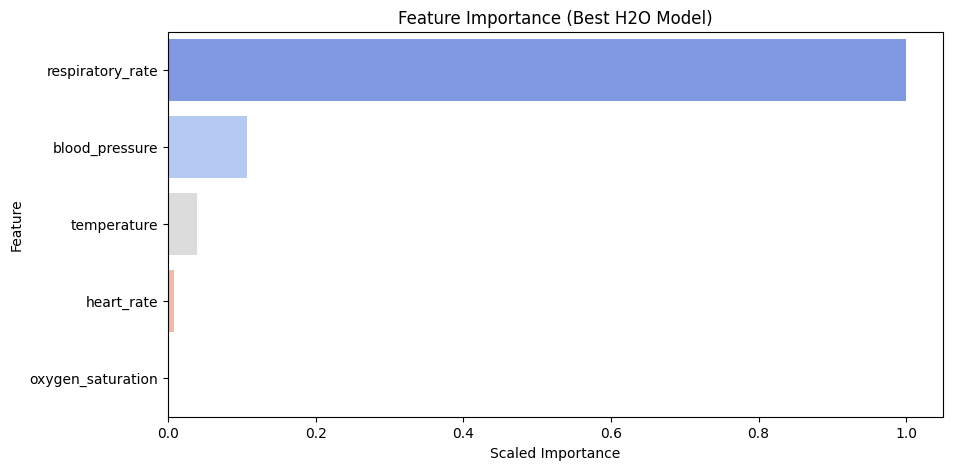

In [34]:
# Extract Variable Importance
var_imp = best_model.varimp(use_pandas=True)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=var_imp['scaled_importance'], y=var_imp['variable'], palette="coolwarm")
plt.title("Feature Importance (Best H2O Model)")
plt.xlabel("Scaled Importance")
plt.ylabel("Feature")
plt.show()


<ipython-input-35-bced8dba2a50>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


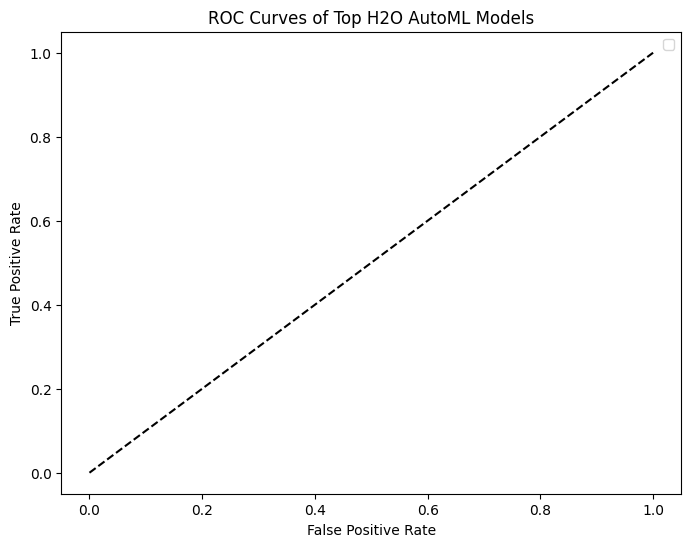

In [35]:
from sklearn.metrics import roc_curve

# Extract top 3 models from H2O leaderboard
top_models = leaderboard.iloc[:3]['model_id'].tolist()

# Plot ROC Curves
plt.figure(figsize=(8, 6))

for model_id in top_models:
    model = h2o.get_model(model_id)
    perf = model.model_performance(test_h2o)

    if perf is not None and hasattr(perf, "roc"):
        fpr, tpr, _ = perf.roc()
        plt.plot(fpr, tpr, label=f"{model_id} (AUC: {perf.auc():.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of Top H2O AutoML Models")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

model = joblib.load("cardio_model.pkl")
scaler = joblib.load("scaler.pkl")

def predict_cvd():
    # Input features
    subject_id = input("Enter Subject ID: ")
    icustay_id = input("Enter ICU Stay ID: ")
    heart_rate = float(input("Enter Heart Rate (bpm): "))
    blood_pressure = float(input("Enter Blood Pressure (mmHg): "))
    oxygen_saturation = float(input("Enter Oxygen Saturation (%): "))
    respiratory_rate = float(input("Enter Respiratory Rate (breaths/min): "))
    temperature = float(input("Enter Temperature (°C): "))

    input_data = np.array([[heart_rate, blood_pressure, oxygen_saturation, respiratory_rate, temperature]])
    input_scaled = scaler.transform(input_data) if scaler else input_data
    prediction = model.predict(input_scaled)[0]
    focus_areas = []
    if heart_rate < 60 or heart_rate > 100:
        focus_areas.append("Heart Rate")
    if blood_pressure < 90 or blood_pressure > 140:
        focus_areas.append("Blood Pressure")
    if oxygen_saturation < 95:
        focus_areas.append("Oxygen Saturation")
    if respiratory_rate < 12 or respiratory_rate > 20:
        focus_areas.append("Respiratory Rate")
    if temperature < 36 or temperature > 37.5:
        focus_areas.append("Temperature")

    print(f"\nPatient ID: {subject_id}, ICU Stay ID: {icustay_id}")
    print(f"Predicted CVD Risk: {'High' if prediction == 1 else 'Low'}")

    if focus_areas:
        print(f"Focus on these attributes: {', '.join(focus_areas)}")
    else:
        print("All vitals are within a normal range.")

predict_cvd()


Enter Subject ID: 110976
Enter ICU Stay ID: 301245
Enter Heart Rate (bpm): 101
Enter Blood Pressure (mmHg): 101
Enter Oxygen Saturation (%): 99
Enter Respiratory Rate (breaths/min): 13
Enter Temperature (°C): 37.9

Patient ID: 110976, ICU Stay ID: 301245
Predicted CVD Risk: Low
🩺 **Focus on these attributes:** Heart Rate, Temperature


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
